In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [5]:
path = "data/"

proccessed= pd.read_csv(path+'A2_data_preprocessed.csv')

reduced=pd.read_csv(path+'Umap_reduced_data_3.csv')
reduced2=pd.read_csv(path+'Umap_reduced_data.csv')

In [70]:
def visualise_components(model_name, finaldim, C1, C2, single='False'):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(f'Component {C1}', fontsize = 15)
    ax.set_ylabel(f'Component {C2}', fontsize = 15)
    colors = ['r', 'g', 'b','k','y']
    if single != 'False':
        targets = np.unique(finaldim['class'])[[single]]
        colors=colors[single]
        model_name+=' '+str(*targets)
    else:
        targets = np.unique(finaldim['class'])

    for target, color in zip(targets,colors):
        indicesToKeep = finaldim['class'] == target
        ax.scatter(finaldim.loc[indicesToKeep, f'component {C1}']
                , finaldim.loc[indicesToKeep, f'component {C2}']
                , c = color
                , s = 10
                , marker = '.',alpha=0.2)
    ax.legend(targets, fontsize=15)
    ax.set_title(f'2 component {model_name}', fontsize = 20)
    ax.grid()
    plt.savefig(f'plots/{model_name}_{C1}_{C2}.pdf')
    plt.show()

In [71]:
targets = np.unique(reduced['class'])[[0]]
targets

array(['GALAXY'], dtype=object)

In [ ]:
visualise_components('UMAP', reduced, '1', '2')
visualise_components('UMAP', reduced, '2', '3')
visualise_components('UMAP', reduced, '1', '3')
visualise_components('UMAP', reduced, '1', '3', single=0)
visualise_components('UMAP', reduced, '1', '3', single=1)
visualise_components('UMAP', reduced, '1', '3', single=2)

visualise_components('UMAP', reduced2, '1', '2')

In [7]:
#Cluster the preprocessed data
data= proccessed
X,y= data.loc[:, data.columns != 'class'], data['class']
Class_Names=np.unique(y)
clustering = KMeans(n_clusters=len(Class_Names),random_state=5)
clustering.fit(X)

labels=pd.DataFrame(clustering.labels_)
labels.columns =["class"]
kmeans_Df=X.join(labels)

nmis=0 #number misclassified
for i,t in enumerate(kmeans_Df['class']):
    if Class_Names[t] != y[i]:
        nmis+=1
        #print(i, Class_Names[t])

print(f'Out of {len(y)} there are {nmis} missclassified samples, thus an accuracy of {nmis/len(y)}')


Out of 99999 there are 51851 missclassified samples, thus an accuracy of 0.5185151851518515


In [78]:
proccessed

,component 1,component 2,class
0,3.315816,10.204698,GALAXY
1,2.379662,13.190008,GALAXY
2,11.678057,3.559616,GALAXY
3,12.111143,3.726232,GALAXY
4,0.004248,4.538530,GALAXY
...,...,...,...
66994,8.915668,9.936466,QSO
66995,-0.849385,13.286939,GALAXY
66996,0.220796,6.757593,STAR
66997,7.238748,0.336582,GALAXY


In [48]:
#Rund the PCA reduced dataset 
data= reduced2
X,y= data.loc[:, data.columns != 'class'], data['class']
clustering = KMeans(n_clusters=3,random_state=5)
#fit the dataset
clustering.fit(X)


KMeans(n_clusters=3, random_state=5)

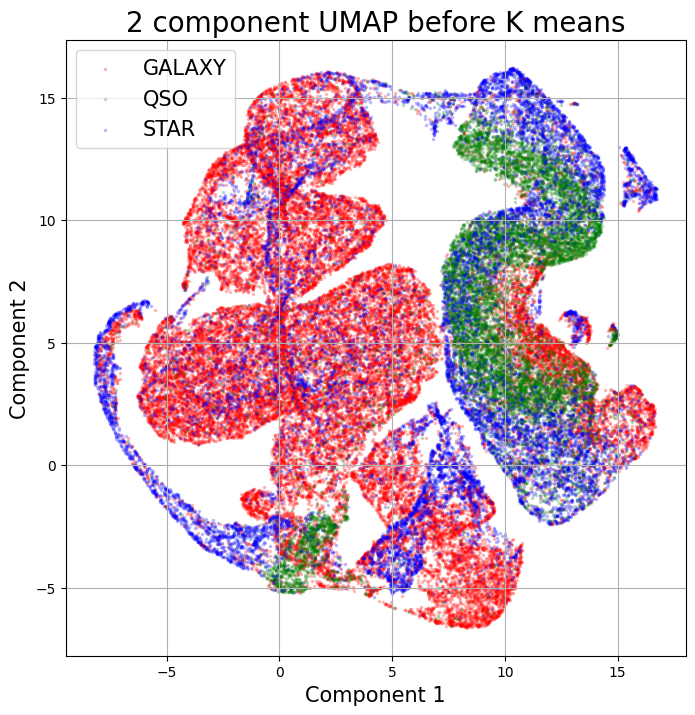

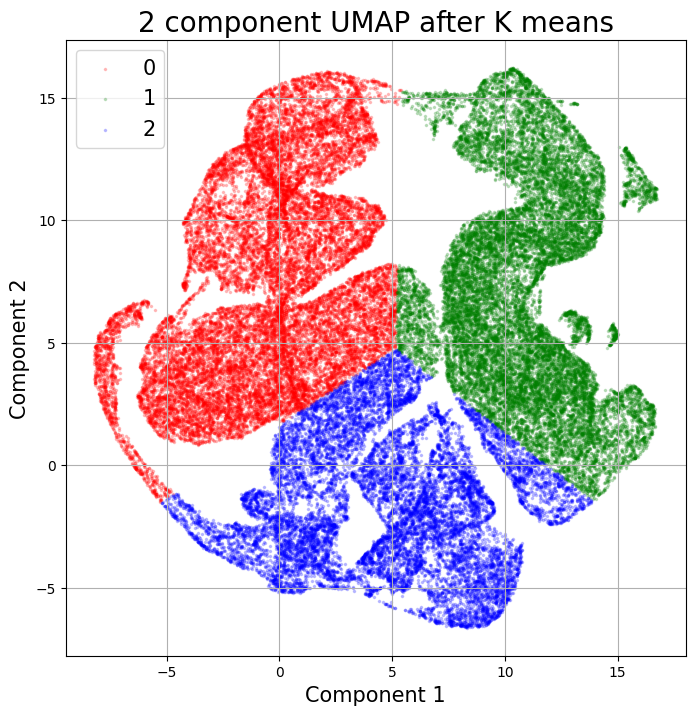

In [57]:

visualise_components('UMAP before K means', reduced2, '1', '2')

labels=pd.DataFrame(clustering.labels_)
labels.columns =["class"]
kmeans_Df=X.join(labels)

visualise_components('UMAP after K means', kmeans_Df, '1', '2')

Class_Names=np.unique(y)
nmis=0 #number misclassified
for i,t in enumerate(kmeans_Df['class']):
    if Class_Names[t] != y[i]:
        nmis+=1
        #print(i, Class_Names[t])

print(f'Out of {len(y)} there are {nmis} missclassified samples, thus an accuracy of {nmis/len(y)}')


Out of 66999 there are 30950 missclassified samples, thus accuracy of 0.4619471932416902


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

x= UmapDf
X_std = StandardScaler().fit_transform(x)

clt = OPTICS()

model = clt.fit(X_std)

clusters = pd.DataFrame(model.fit_predict(X_std))
x["Cluster"] = clusters

fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(x['component 1'],x['component 2'], c=x["Cluster"],s=50)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()